In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2020 = pd.read_excel('2020data.xlsx')
data2021 = pd.read_excel('2021data.xlsx')
data2022 = pd.read_excel('2022data.xlsx')

In [10]:
# 정의된 컬럼 목록
columns_to_keep = [
    'SIGUNGU', 'Q1', 'Q4', 'Q6', 'Q7', 'Q9', 'Q11', 'Q14_1', 'Q20', 'Q20_2_1', 'Q20_2_2', 'Q20_2_3',
    'Q21_1_A', 'Q21_1_B', 'Q25_1', 'Q25_2', 'Q28', 'Q33', 'Q34_1', 'Q36', 'Q41', 'Q46_A1_1', 
    'Q46_A4_1', 'Q46_A4_2', 'Q49_1_1', 'Q49_1_6', 'Q50_1', 'Q52_1', 'Q52_1_1', 'Q52_2', 'Q52_3', 
    'Q52_4', 'Q53'
]

data2020_selected = data2020[columns_to_keep]
data2021_selected = data2021[columns_to_keep]
data2022_selected = data2022[columns_to_keep]

# 추출된 데이터프레임을 결합
combined_df = pd.concat([data2020_selected, data2021_selected, data2022_selected], ignore_index=True)

# 결과 확인
print(combined_df.head())

  SIGUNGU  Q1  Q4  Q6  Q7  Q9  Q11  Q14_1  Q20  Q20_2_1  ...  Q46_A4_2  \
0      20   2   2   3   3   2  NaN    1.0    1      NaN  ...       2.0   
1      12   1   6   1   1   2  2.0    NaN    2      3.0  ...       2.0   
2       5   1   4   1   1   2  4.0    NaN    2      3.0  ...       NaN   
3       5   2   4   1   1   2  1.0    NaN    2      3.0  ...       2.0   
4       5   1   4   1   1   2  4.0    NaN    2      3.0  ...       NaN   

   Q49_1_1  Q49_1_6  Q50_1  Q52_1  Q52_1_1  Q52_2  Q52_3  Q52_4  Q53  
0      350      350    250      0        0    600      0    600    2  
1      500      500    300  40000    40000      0      0  40000    1  
2        0        0     50  40000    40000      0      0  40000    2  
3        0       70     70  49000    49000      0      0  49000    1  
4        0       75     75  50000    50000      0      0  50000    2  

[5 rows x 33 columns]


In [13]:
combined_df.shape

(46252, 33)

In [14]:
combined_df.dtypes

SIGUNGU      object
Q1            int64
Q4            int64
Q6            int64
Q7            int64
Q9            int64
Q11         float64
Q14_1       float64
Q20           int64
Q20_2_1     float64
Q20_2_2     float64
Q20_2_3     float64
Q21_1_A     float64
Q21_1_B     float64
Q25_1         int64
Q25_2         int64
Q28         float64
Q33           int64
Q34_1       float64
Q36         float64
Q41           int64
Q46_A1_1      int64
Q46_A4_1      int64
Q46_A4_2    float64
Q49_1_1       int64
Q49_1_6       int64
Q50_1         int64
Q52_1         int64
Q52_1_1       int64
Q52_2         int64
Q52_3         int64
Q52_4         int64
Q53           int64
dtype: object

In [5]:
pd.set_option('display.max_rows', None)
combined_df.isna().mean()

SIGUNGU     0.000000
Q1          0.000000
Q4          0.000000
Q6          0.000000
Q7          0.000000
Q9          0.000000
Q11         0.535717
Q14_1       0.484433
Q20         0.000000
Q20_2_1     0.121184
Q20_2_2     0.121184
Q20_2_3     0.121184
Q21_1_A     0.000000
Q21_1_B     0.000000
Q25_1       0.000000
Q25_2       0.000000
Q28         0.321824
Q33         0.000000
Q34_1       0.185549
Q36         0.924111
Q41         0.000000
Q46_A1_1    0.000000
Q46_A4_1    0.000000
Q46_A4_2    0.282734
Q49_1_1     0.000000
Q49_1_6     0.000000
Q50_1       0.000000
Q52_1       0.000000
Q52_1_1     0.000000
Q52_2       0.000000
Q52_3       0.000000
Q52_4       0.000000
Q53         0.000000
dtype: float64

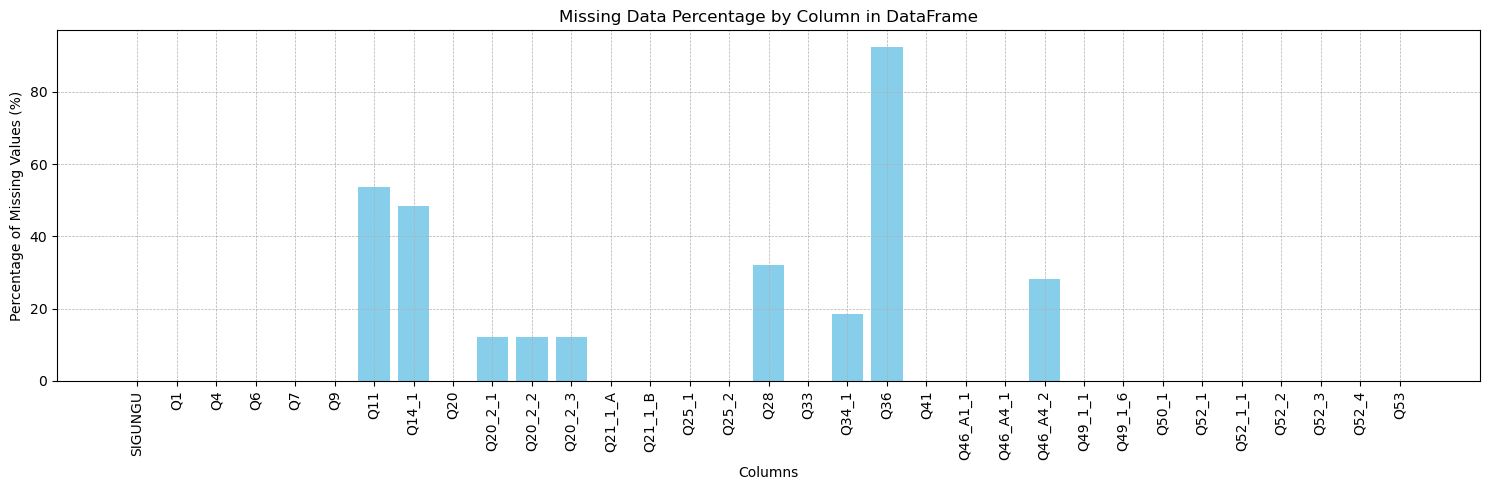

In [6]:
# 각 컬럼별 결측치 비율 계산
missing_ratios = combined_df.isna().mean() * 100

# 시각화
plt.figure(figsize=(15, 5))  # 그래프 크기 설정
plt.bar(missing_ratios.index, missing_ratios, color='skyblue')  # 막대 그래프 생성
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Missing Data Percentage by Column in DataFrame')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 그리드 추가
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()

In [7]:
missing_count_q11 = combined_df['Q11'].isna().sum()
print(f"The number of missing values in 'Q11': {missing_count_q11}")

The number of missing values in 'Q11': 24778


In [15]:
missing_count_q14 = combined_df['Q14_1'].isna().sum()
print(f"The number of missing values in 'Q14': {missing_count_q14}")

The number of missing values in 'Q14': 22406


In [16]:
missing_count_q28 = combined_df['Q28'].isna().sum()
print(f"The number of missing values in 'Q28': {missing_count_q28}")

The number of missing values in 'Q28': 14885


In [17]:
df = combined_df.drop(columns=['Q11', 'Q14_1', 'Q20_2_1','Q20_2_2','Q20_2_3', 'Q36', 'Q46_A4_2'])
print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
print(df.columns)

Index(['SIGUNGU', 'Q1', 'Q4', 'Q6', 'Q7', 'Q9', 'Q20', 'Q21_1_A', 'Q21_1_B',
       'Q25_1', 'Q25_2', 'Q28', 'Q33', 'Q34_1', 'Q41', 'Q46_A1_1', 'Q46_A4_1',
       'Q49_1_1', 'Q49_1_6', 'Q50_1', 'Q52_1', 'Q52_1_1', 'Q52_2', 'Q52_3',
       'Q52_4', 'Q53'],
      dtype='object')


In [22]:
# 'Q28' 컬럼에서 NaN 값을 포함하는 행을 삭제
df_cleaned = df.dropna(subset=['Q28'])

# 결과 확인
print(df_cleaned)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
df_cleaned.shape

(31367, 26)

In [24]:
print(df_cleaned.head(10))

   SIGUNGU  Q1  Q4  Q6  Q7  Q9  Q20  Q21_1_A  Q21_1_B  Q25_1  ...  Q46_A4_1  \
0       20   2   2   3   3   2    1      6.0     19.8      3  ...         1   
8        5   2   4   1   2   2    2     25.0     82.5      3  ...         1   
9        5   2   4   1   1   2    2     25.0     82.5      3  ...         1   
10      12   1   3   1   2   2    2     18.0     59.4      3  ...         1   
11       5   2   4   1   3   2    2     25.0     82.5      3  ...         1   
13      12   2   1   1   2   2    2     17.0     56.1      3  ...         1   
14      12   1   3   1   2   2    2     18.0     59.4      3  ...         1   
15      18   1   4   1   3   2    2     12.0     39.6      3  ...         2   
16      18   1   4   1   3   2    2     12.0     39.6      3  ...         1   
17      18   2   4   1   3   2    2     12.0     39.6      3  ...         1   

    Q49_1_1  Q49_1_6  Q50_1  Q52_1  Q52_1_1    Q52_2  Q52_3    Q52_4  Q53  
0       350      350    250      0        0      600  

In [26]:
print(df_cleaned['Q34_1'])

0        10.0
8         7.0
9         2.0
10        1.0
11        7.0
13        7.0
14        9.0
15        8.0
16        3.0
17       11.0
18        3.0
19        3.0
20        1.0
21        3.0
22        3.0
23        1.0
24       10.0
25        7.0
26        2.0
28        1.0
29       10.0
30       10.0
31        5.0
32       10.0
33       11.0
34       10.0
35        1.0
36        9.0
37        5.0
38        1.0
39        8.0
40        8.0
41        8.0
42        8.0
43        3.0
44       11.0
47        9.0
48        5.0
49        3.0
50        1.0
52        7.0
53        2.0
54        5.0
55        7.0
56        4.0
57       10.0
58        2.0
59        1.0
60        2.0
61       10.0
62        2.0
63       10.0
64       10.0
66        2.0
67        7.0
71        4.0
72        5.0
73        7.0
74        5.0
75        5.0
76        5.0
77        4.0
79        7.0
82        7.0
83        1.0
84       10.0
86        9.0
89        4.0
90       10.0
92        7.0
93       10.0
95    

In [27]:
missing_count_q34 = df_cleaned['Q34_1'].isna().sum()
print(f"The number of missing values in 'Q34': {missing_count_q34}")

The number of missing values in 'Q34': 0


In [28]:
df_cleaned.isna().sum()

SIGUNGU     0
Q1          0
Q4          0
Q6          0
Q7          0
Q9          0
Q20         0
Q21_1_A     0
Q21_1_B     0
Q25_1       0
Q25_2       0
Q28         0
Q33         0
Q34_1       0
Q41         0
Q46_A1_1    0
Q46_A4_1    0
Q49_1_1     0
Q49_1_6     0
Q50_1       0
Q52_1       0
Q52_1_1     0
Q52_2       0
Q52_3       0
Q52_4       0
Q53         0
dtype: int64

In [29]:
df_cleaned.shape

(31367, 26)

In [32]:
df = df_cleaned

df.shape

(31367, 26)

## 모델링

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 인코딩
df_encoded = pd.get_dummies(df)

# 결측치 처리
df_encoded.fillna(df_encoded.mean(), inplace=True)

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_k

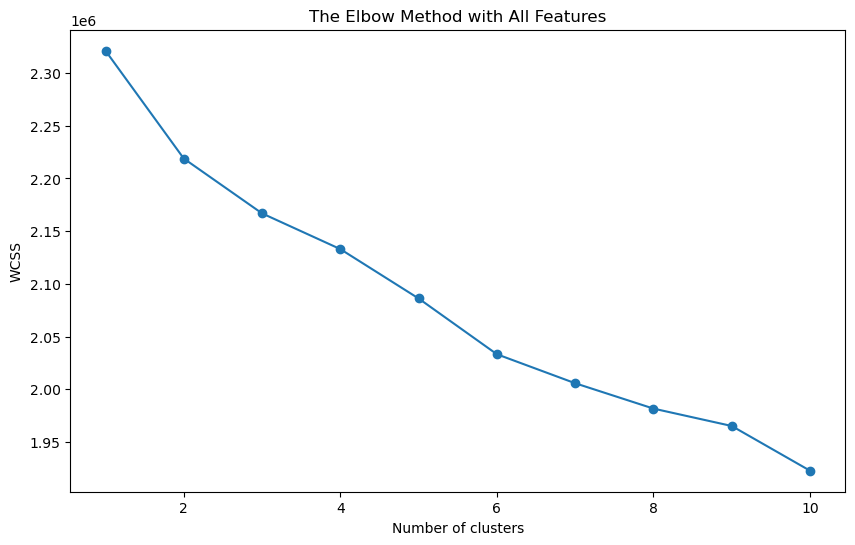

In [34]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method with All Features')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

전체컬럼으로 엘보우 보니, 잘 안보여서 기존 생각 그래도 경제력 관련 컬럼/주거관련 컬럼 나눠서 클러스터링 해보겠음

In [36]:
df.columns

Index(['SIGUNGU', 'Q1', 'Q4', 'Q6', 'Q7', 'Q9', 'Q20', 'Q21_1_A', 'Q21_1_B',
       'Q25_1', 'Q25_2', 'Q28', 'Q33', 'Q34_1', 'Q41', 'Q46_A1_1', 'Q46_A4_1',
       'Q49_1_1', 'Q49_1_6', 'Q50_1', 'Q52_1', 'Q52_1_1', 'Q52_2', 'Q52_3',
       'Q52_4', 'Q53'],
      dtype='object')

## 주거관련 클러스터링

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_k

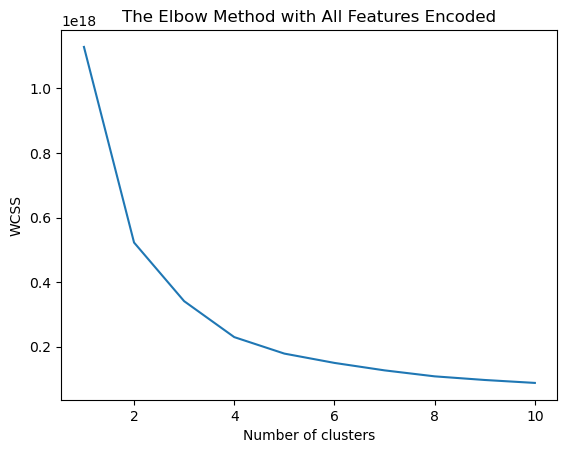

In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# SIGUNGU 컬럼의 데이터 타입을 문자열로 변환
df['SIGUNGU'] = df['SIGUNGU'].astype(str)

# 라벨 인코더 초기화
encoder = LabelEncoder()

# SIGUNGU 컬럼을 라벨 인코딩
df['SIGUNGU_encoded'] = encoder.fit_transform(df['SIGUNGU'])

# 데이터프레임의 모든 범주형 컬럼을 원-핫 인코딩
df_encoded_home = pd.get_dummies(df, columns=['Q1', 'Q4', 'Q6', 'Q7', 'Q9', 'Q20', 'Q21_1_A', 'Q21_1_B', 'Q25_1', 'Q25_2', 'Q28', 'Q33', 'Q34_1', 'Q41', 'Q46_A1_1', 'Q46_A4_1'])

# 클러스터링에 사용할 컬럼 선택
features = df_encoded_home.drop('SIGUNGU', axis=1)  # SIGUNGU 원본 컬럼 제거

# WCSS 계산
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# WCSS 그래프 시각화
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method with All Features Encoded')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[3.57643444e+02 3.42672983e+04 1.97026012e+04 ... 1.00000000e+00
  7.88762344e-01 2.11237656e-01]
 [2.91643102e+05 7.12387118e+05 4.88114417e+04 ... 1.00000000e+00
  8.50323625e-01 1.49676375e-01]
 [9.34871427e+06 9.99999900e+06 3.41700813e+06 ... 1.00000000e+00
  7.88577154e-01 2.11422846e-01]
 [3.73700793e+02 4.83443884e+05 1.44450903e+05 ... 1.00000000e+00
  8.26964672e-01 1.73035328e-01]]
Cluster Labels:
0    27746
3     1387
1     1236
2      998
Name: Housing_Cluster, dtype: int64


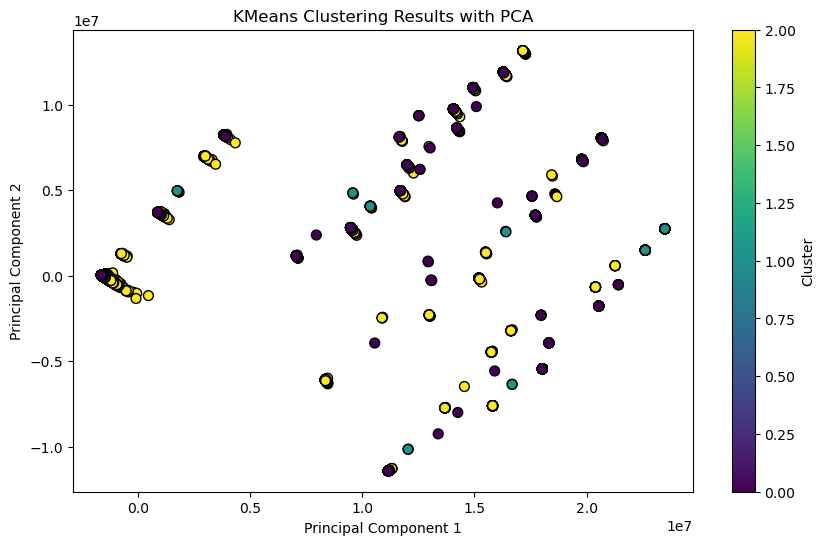

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# 최적의 클러스터 개수 설정 (여기서는 3으로 가정)
optimal_clusters = 4

# KMeans 클러스터링 모델 생성 및 피팅
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df_encoded_home['Housing_Cluster'] = kmeans.fit_predict(features)

# 각 클러스터의 중심 출력
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# 클러스터 할당 결과 출력
print("Cluster Labels:")
print(df_encoded_home['Housing_Cluster'].value_counts())

# 클러스터링 결과 시각화 (주요 두 개의 주성분으로 시각화)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df_encoded['Housing_Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results with PCA')
plt.colorbar(label='Cluster')
plt.show() 

In [58]:
df['Housing_Cluster'] = df_encoded['Housing_Cluster']

# 각 구별로 가장 흔한 클러스터를 찾기
sigungu_cluster_mode = df.groupby('SIGUNGU')['Housing_Cluster'].agg(lambda x: x.mode()[0])

# 결과 출력
print(sigungu_cluster_mode)

SIGUNGU
1       0
10      0
11      0
12      0
13      0
14      0
15      2
16      0
17      0
18      0
19      0
2       0
20      0
21      0
22      0
23      0
24      0
25      0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
강남구     2
강동구     2
강북구     0
강서구     0
관악구     0
광진구     0
구로구     0
금천구     0
노원구     0
도봉구     0
동대문구    0
동작구     0
마포구     0
서대문구    0
서초구     2
성동구     0
성북구     0
송파구     0
양천구     0
영등포구    0
용산구     2
은평구     0
종로구     0
중구      0
중랑구     0
Name: Housing_Cluster, dtype: int32


클러스터 0
클러스터 0에 속한 구: 강북구, 강서구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 성동구, 성북구, 송파구, 양천구, 영등포구, 은평구, 종로구, 중구, 중랑구
주요 특성:
클러스터 0은 가장 많은 구(21개 구)가 속해 있으며, 27,746개의 데이터 포인트를 포함하고 있습니다.
이 클러스터에 속한 구들은 주로 일반적인 주거 특성을 가지며, 서울시 대부분의 지역에서 공통적으로 나타나는 주거 형태일 가능성이 큽니다.
해석: 클러스터 0은 서울시 전반에 걸쳐 흔한 주거 특성을 나타냅니다. 예를 들어, 아파트 거주 비율이 높거나, 전세 및 월세 비율이 균형 잡힌 상태일 수 있습니다. 이 클러스터에 속한 구들은 상대적으로 평균적인 주거 환경을 가지고 있을 가능성이 큽니다.
클러스터 1
클러스터 1에 속한 구: (결과에 따르면, 클러스터 1에 속한 구는 없으므로, 구체적인 구 이름은 나오지 않았습니다)
주요 특성:
클러스터 1은 1,236개의 데이터 포인트를 포함하고 있으며, 상대적으로 소수의 특정한 주거 특성을 가진 지역을 나타냅니다.
해석: 클러스터 1은 일반적이지 않은 특성을 가진 주거지를 나타낼 수 있습니다. 예를 들어, 특정한 유형의 주거지(고급 빌라나 타운하우스 등)에 거주하거나, 매우 낮은 인구 밀도를 가진 지역일 수 있습니다.
클러스터 2
클러스터 2에 속한 구: 강남구, 서초구, 용산구
주요 특성:
클러스터 2는 998개의 데이터 포인트를 포함하고 있으며, 서울에서 주거 특성이 매우 고급스럽거나 특수한 지역을 나타냅니다.
이 클러스터에 속한 구들은 서울에서 부유층이 많이 거주하는 지역입니다.
해석: 클러스터 2는 고급 주거지 특성을 나타냅니다. 강남구, 서초구, 용산구와 같은 지역은 고소득층이 많이 거주하며, 주로 고급 아파트나 주택이 밀집해 있는 구들입니다. 이 지역의 주거 환경은 매우 양호하며, 주거 만족도도 높을 가능성이 큽니다.
클러스터 3
클러스터 3에 속한 구: (결과에 따르면, 클러스터 3에 속한 구는 없습니다)
주요 특성:
클러스터 3은 1,387개의 데이터 포인트를 포함하고 있습니다.
해석: 클러스터 3은 특이한 주거 환경을 나타내는 지역일 수 있으며, 주거 형태가 매우 특수하거나, 특정 조건에 따른 주거 형태일 수 있습니다. 예를 들어, 주거 만족도가 매우 높거나 낮은 지역, 또는 신축 아파트나 특정한 유형의 주택단지가 포함될 수 있습니다.
전반적인 해석:
클러스터 0: 서울시 대부분의 구는 주거 환경에서 평균적인 특성을 보이며, 일반적인 주거 형태와 환경을 공유하고 있습니다.
클러스터 2: 강남구, 서초구, 용산구는 고급 주거지로서, 주거 환경이 뛰어나고, 주로 고소득층이 거주하는 지역입니다.
클러스터 1과 3: 각각 특정한 주거 특성을 가지고 있지만, 대부분의 구에서는 지배적이지 않은 특성을 나타내고 있습니다.
이 결과를 바탕으로 서울시의 주거 환경을 분석하고, 각 구별로 적합한 주거 정책이나 지원 방안을 마련할 수 있습니다. 예를 들어, 클러스터 0에 속한 지역은 평균적인 주거 환경을 개선하기 위한 정책을, 클러스터 2에 속한 지역은 고급 주거지의 특성을 유지하고 발전시키기 위한 정책을 고려할 수 있습니다.

==> 이제 챗봇 만들때는 구별로 클러스터 0, 1, 2 숫자 벨류카운트해서 확인한다음에 그에 맞춰서 말 넣어주면 될 듯

## 경제력관련 클러스터링

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_k

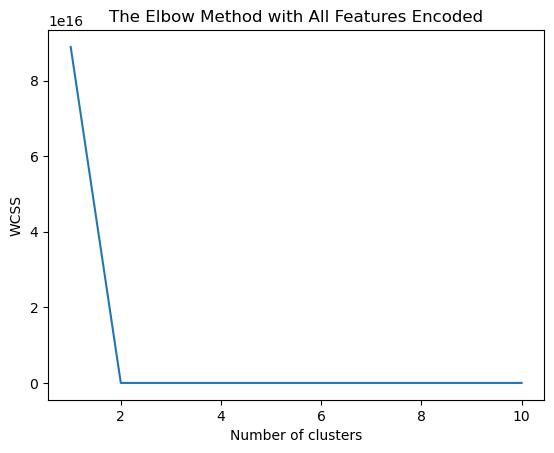

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# SIGUNGU 컬럼의 데이터 타입을 문자열로 변환
df['SIGUNGU'] = df['SIGUNGU'].astype(str)

# 라벨 인코더 초기화
encoder = LabelEncoder()

# SIGUNGU 컬럼을 라벨 인코딩
df['SIGUNGU_encoded'] = encoder.fit_transform(df['SIGUNGU'])

# 데이터프레임의 모든 범주형 컬럼을 원-핫 인코딩
df_encoded = pd.get_dummies(df, columns=['Q49_1_1', 'Q49_1_6', 'Q50_1', 'Q52_1', 'Q52_1_1', 'Q52_2', 'Q52_3',
       'Q52_4', 'Q53'])

# 클러스터링에 사용할 컬럼 선택
features = df_encoded.drop('SIGUNGU', axis=1)  # SIGUNGU 원본 컬럼 제거

# WCSS 계산
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# WCSS 그래프 시각화
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method with All Features Encoded')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Economic Cluster Centers:
[[1.34395826 4.53252054 1.07790463 ... 0.08064266 0.31399494 0.68600506]
 [1.24833703 3.62305987 1.18181818 ... 0.47006652 0.29490022 0.70509978]
 [1.6532572  4.07543905 1.00588286 ... 0.13781469 0.43334198 0.56665802]]
Economic Cluster Labels:
0    19557
2    11359
1      451
Name: Economic_Cluster, dtype: int64


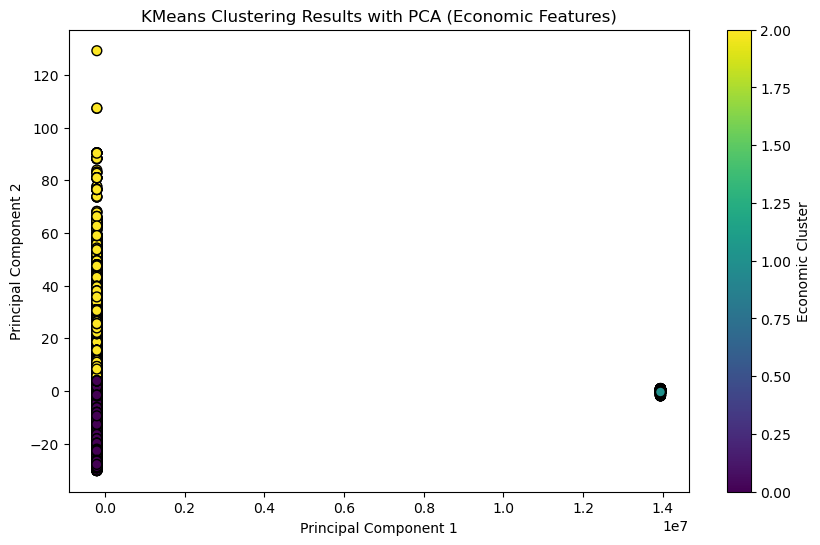

In [49]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 최적의 클러스터 개수 설정 (예시: 3으로 가정)
optimal_clusters_economic = 3

# KMeans 클러스터링 모델 생성 및 피팅
kmeans_economic = KMeans(n_clusters=optimal_clusters_economic, random_state=0)
df_encoded['Economic_Cluster'] = kmeans_economic.fit_predict(features)

# 각 클러스터의 중심 출력
print("Economic Cluster Centers:")
print(kmeans_economic.cluster_centers_)

# 클러스터 할당 결과 출력
print("Economic Cluster Labels:")
print(df_encoded['Economic_Cluster'].value_counts())

# PCA를 사용하여 2차원 시각화를 위한 주성분 분석
pca_economic = PCA(n_components=2)
principal_components_economic = pca_economic.fit_transform(features)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(principal_components_economic[:, 0], principal_components_economic[:, 1], 
            c=df_encoded['Economic_Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results with PCA (Economic Features)')
plt.colorbar(label='Economic Cluster')
plt.show()

In [50]:
# 클러스터 결과를 원래 데이터프레임에 병합
df['Economic_Cluster'] = df_encoded['Economic_Cluster']

# 각 구별로 가장 흔한 클러스터를 찾기
sigungu_economic_cluster_mode = df.groupby('SIGUNGU')['Economic_Cluster'].agg(lambda x: x.mode()[0])

# 결과 출력
print(sigungu_economic_cluster_mode)

SIGUNGU
1       0
10      0
11      0
12      0
13      0
14      0
15      2
16      0
17      0
18      0
19      0
2       0
20      0
21      0
22      0
23      0
24      0
25      0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
강남구     2
강동구     2
강북구     0
강서구     0
관악구     0
광진구     0
구로구     0
금천구     0
노원구     0
도봉구     0
동대문구    0
동작구     0
마포구     0
서대문구    0
서초구     2
성동구     0
성북구     0
송파구     0
양천구     0
영등포구    0
용산구     2
은평구     0
종로구     0
중구      0
중랑구     0
Name: Economic_Cluster, dtype: int32


클러스터 0
클러스터 0에 속한 구: 강북구, 강서구, 관악구, 광진구, 구로구, 금천구, 노원구, 도봉구, 동대문구, 동작구, 마포구, 서대문구, 성동구, 성북구, 송파구, 양천구, 영등포구, 은평구, 종로구, 중구, 중랑구
주요 특성:
클러스터 0은 가장 많은 구(21개 구)가 속해 있으며, 전체적으로 19,557개의 데이터 포인트가 포함되어 있습니다.
이 클러스터에 속한 구들은 주로 서울의 경제력이 중간에서 낮은 수준에 있는 구들일 가능성이 있습니다.
해석: 클러스터 0은 주로 중산층 이하의 경제력을 가진 주민들이 많이 거주하는 지역을 대표할 수 있습니다. 이 구들은 경제적 측면에서 비교적 비슷한 특성을 공유할 수 있으며, 이는 소득 수준, 자산, 또는 소비 패턴에서 유사한 경향을 나타낼 수 있습니다.
클러스터 1
클러스터 1에 속한 구: (강남구, 서초구, 용산구와 같이 상위 경제력을 나타내는 구는 클러스터 2에 속해 있습니다)
주요 특성:
클러스터 1은 451개의 데이터 포인트로, 매우 적은 수의 주민이 속해 있습니다.
이 클러스터는 독특하거나 특이한 경제적 특성을 가진 소수의 집단을 나타낼 수 있습니다.
해석: 클러스터 1은 경제적으로 특이한 패턴을 보이는 집단일 수 있습니다. 예를 들어, 매우 높은 소득을 가진 극소수의 사람들이나, 특정 경제적 행동 패턴(예: 매우 높은 자산 보유율이나 특이한 소비 패턴)을 가진 사람들이 포함될 수 있습니다.
클러스터 2
클러스터 2에 속한 구: 강남구, 강동구, 서초구, 용산구
주요 특성:
클러스터 2는 11,359개의 데이터 포인트가 포함되어 있으며, 서울의 경제력이 높은 구들이 속해 있습니다.
이 클러스터에 속한 구들은 강남구, 서초구, 용산구와 같이 일반적으로 고소득층이 많이 거주하는 지역입니다.
해석: 클러스터 2는 서울의 상위 경제력을 가진 지역을 나타내며, 높은 소득과 자산을 가진 주민들이 많이 거주하는 구들입니다. 이 구들은 경제적 측면에서 상위 20%에 해당하는 고소득층이나 부유한 가구를 많이 포함하고 있을 가능성이 큽니다.
전반적인 해석:
클러스터 0: 서울의 대부분의 구는 중산층 이하의 경제력을 나타내며, 경제적 측면에서 큰 차이를 보이지 않는 경향이 있습니다.
클러스터 1: 매우 소수의 특이한 경제적 특성을 가진 집단으로, 구별로 두드러지게 나타나지는 않습니다.
클러스터 2: 강남구, 서초구, 용산구와 같은 고소득층이 밀집된 구들로, 경제력이 높은 주민들이 많이 거주하는 지역입니다.
이 결과를 바탕으로 서울시의 경제적 분포를 분석하거나, 각 구별로 차별화된 정책을 수립하는 데 도움이 될 수 있습니다. 예를 들어, 클러스터 0에 속한 구들에 대해서는 중산층 이하의 주민들을 위한 지원 정책을, 클러스터 2에 속한 구들에 대해서는 고소득층의 요구에 맞춘 정책을 고려할 수 있습니다.

In [59]:
df.columns

Index(['SIGUNGU', 'Q1', 'Q4', 'Q6', 'Q7', 'Q9', 'Q20', 'Q21_1_A', 'Q21_1_B',
       'Q25_1', 'Q25_2', 'Q28', 'Q33', 'Q34_1', 'Q41', 'Q46_A1_1', 'Q46_A4_1',
       'Q49_1_1', 'Q49_1_6', 'Q50_1', 'Q52_1', 'Q52_1_1', 'Q52_2', 'Q52_3',
       'Q52_4', 'Q53', 'SIGUNGU_encoded', 'Cluster', 'Economic_Cluster',
       'Housing_Cluster'],
      dtype='object')

In [61]:
df.drop('Cluster', axis=1, inplace=True)

df.columns

Index(['SIGUNGU', 'Q1', 'Q4', 'Q6', 'Q7', 'Q9', 'Q20', 'Q21_1_A', 'Q21_1_B',
       'Q25_1', 'Q25_2', 'Q28', 'Q33', 'Q34_1', 'Q41', 'Q46_A1_1', 'Q46_A4_1',
       'Q49_1_1', 'Q49_1_6', 'Q50_1', 'Q52_1', 'Q52_1_1', 'Q52_2', 'Q52_3',
       'Q52_4', 'Q53', 'SIGUNGU_encoded', 'Economic_Cluster',
       'Housing_Cluster'],
      dtype='object')

In [62]:
df.to_csv('구별주민특성추가데이터.csv', index=False)